In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [3]:
df = pd.read_csv('./lc_14to16.csv')
# Check for missing values
print(df.isnull().sum())

C:\Users\Lawry\AppData\Local\Temp\ipykernel_46108\2082294171.py:1: DtypeWarning: Columns (19,59,129,130,131,134,135,136,139) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./lc_14to16.csv')


id                             0
member_id                1091131
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
                          ...   
settlement_status        1063938
settlement_date          1063938
settlement_amount        1063938
settlement_percentage    1063938
settlement_term          1063938
Length: 151, dtype: int64


In [4]:
# Convert 'issue_d' to datetime
df['issue_d'] = pd.to_datetime(df['issue_d'])

# Convert 'int_rate' and 'revol_util' to float
def convert_to_float(x):
    if isinstance(x, str):
        return float(x.rstrip('%')) / 100.0
    elif pd.notnull(x):
        return float(x) / 100.0
    else:
        return np.nan

df['int_rate'] = df['int_rate'].apply(convert_to_float)
df['revol_util'] = df['revol_util'].apply(convert_to_float)

# Convert 'term' to integer
df['term'] = df['term'].str.extract('(\d+)').astype(int)

# Print the first few rows to verify the changes
print(df[['int_rate', 'revol_util', 'term']].head())

<>:17: SyntaxWarning: invalid escape sequence '\d'
<>:17: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Lawry\AppData\Local\Temp\ipykernel_46108\37052577.py:17: SyntaxWarning: invalid escape sequence '\d'
  df['term'] = df['term'].str.extract('(\d+)').astype(int)


   int_rate  revol_util  term
0    0.1399       0.297    36
1    0.1199       0.192    36
2    0.1078       0.562    60
3    0.1485       0.116    60
4    0.2245       0.645    60


In [5]:
columns_to_drop = ['url', 'desc', 'member_id']
df = df.drop(columns=columns_to_drop)

In [6]:
df.to_csv('cleaned_lending_club_data.csv', index=False)

In [7]:


df = pd.read_csv('./cleaned_lending_club_data.csv')
# Assuming 'df' is your DataFrame
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%Y-%m-%d')

# Filter for before and after controversy
before_controversy = df[df['issue_d'] < '2016-05-01']
after_controversy = df[df['issue_d'] >= '2016-05-01']

print(df.shape)
print(before_controversy.shape)
print(after_controversy.shape)


C:\Users\Lawry\AppData\Local\Temp\ipykernel_46108\3237246754.py:1: DtypeWarning: Columns (56,126,127,128,131,132,133,136) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./cleaned_lending_club_data.csv')


(1091131, 148)
(827043, 148)
(264088, 148)


C:\Users\Lawry\AppData\Local\Temp\ipykernel_46108\2631867721.py:2: DtypeWarning: Columns (56,126,127,128,131,132,133,136) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./cleaned_lending_club_data.csv')


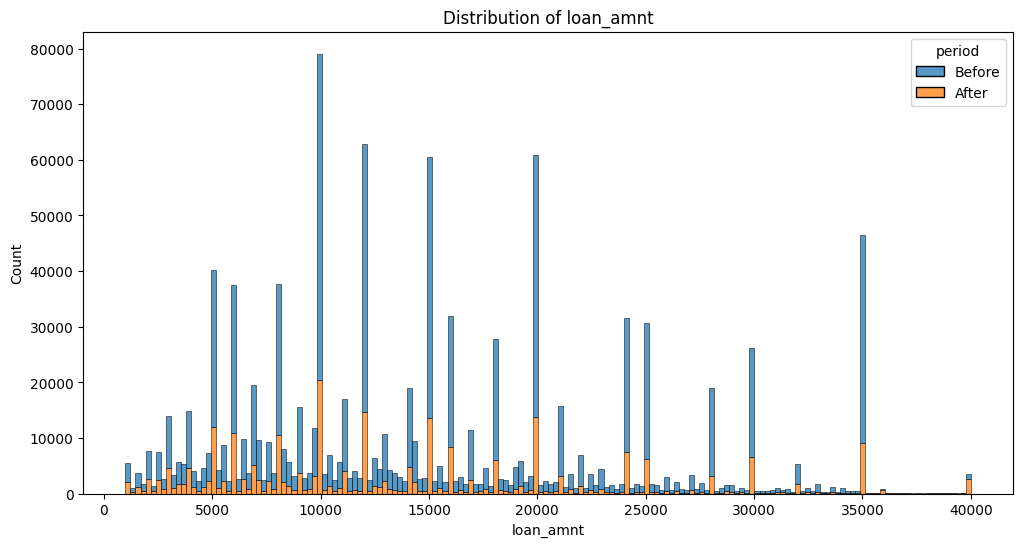


loan_amnt Summary:
           count          mean          std     min     25%      50%      75%  \
period                                                                          
After   264088.0  14298.545277  9026.006029  1000.0  7200.0  12000.0  20000.0   
Before  827043.0  15169.639094  8604.112858  1000.0  8400.0  14000.0  20000.0   

            max  
period           
After   40000.0  
Before  40000.0  


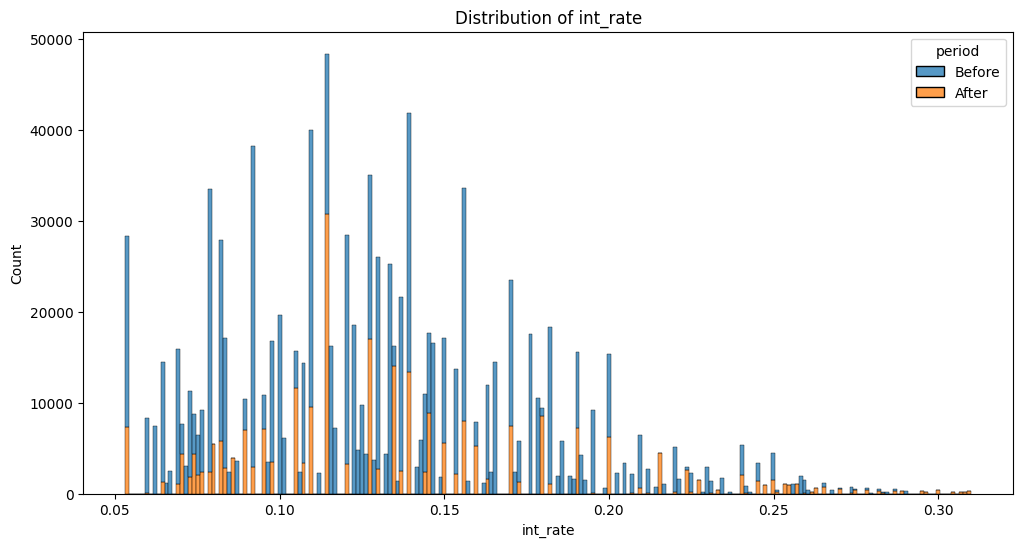


int_rate Summary:
           count      mean       std     min     25%     50%     75%     max
period                                                                      
After   264088.0  0.134131  0.049403  0.0532  0.1049  0.1279  0.1559  0.3099
Before  827043.0  0.129052  0.044715  0.0532  0.0917  0.1269  0.1561  0.2996


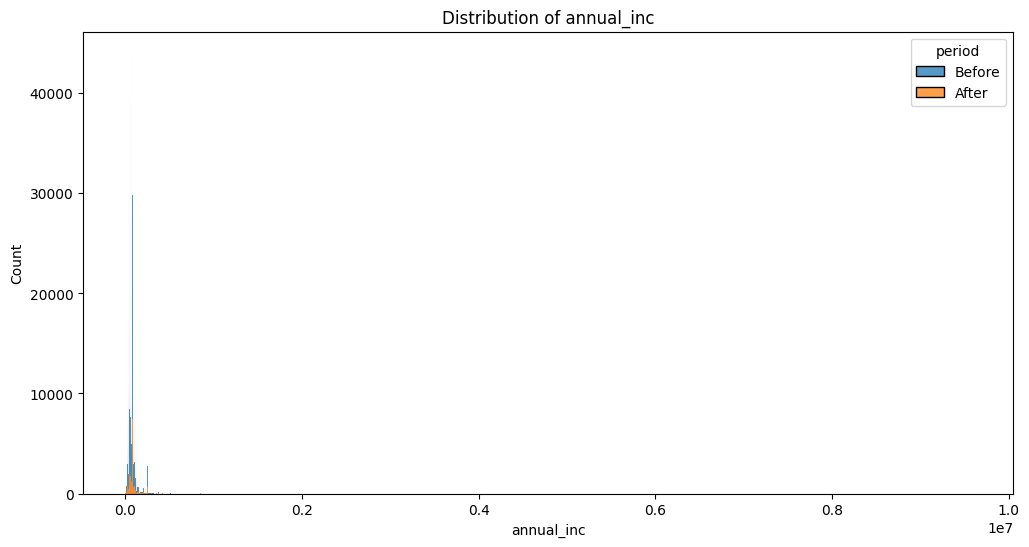


annual_inc Summary:
           count          mean           std  min      25%      50%      75%  \
period                                                                         
After   264088.0  79266.977196  73768.615669  0.0  48000.0  66000.0  95000.0   
Before  827043.0  76959.469070  71165.207758  0.0  46500.0  65000.0  91698.0   

              max  
period             
After   8400000.0  
Before  9573072.0  


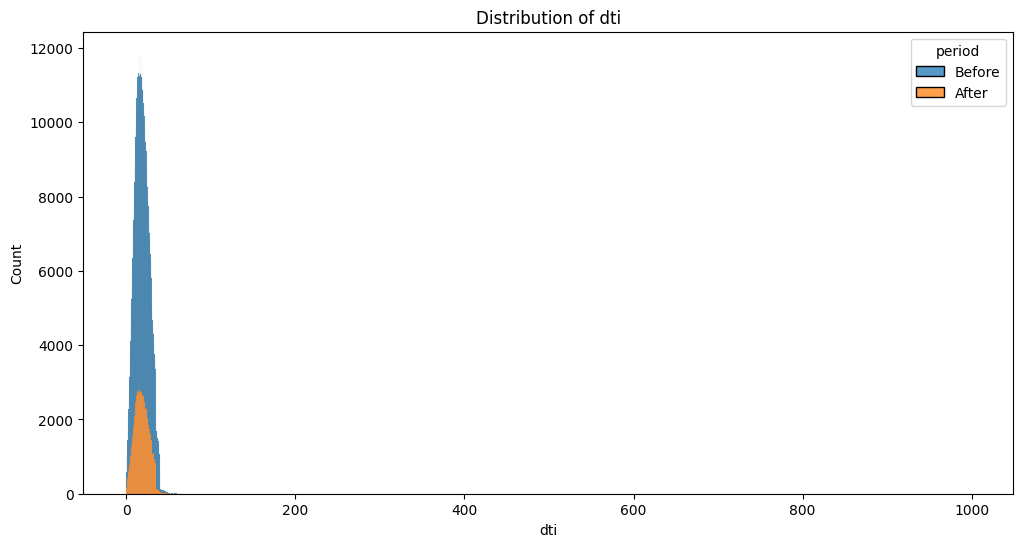


dti Summary:
           count       mean        std  min    25%    50%    75%    max
period                                                                 
After   264050.0  18.476174  10.607937  0.0  12.17  17.96  24.37  999.0
Before  827016.0  18.898561   8.922688 -1.0  12.41  18.31  24.94  999.0


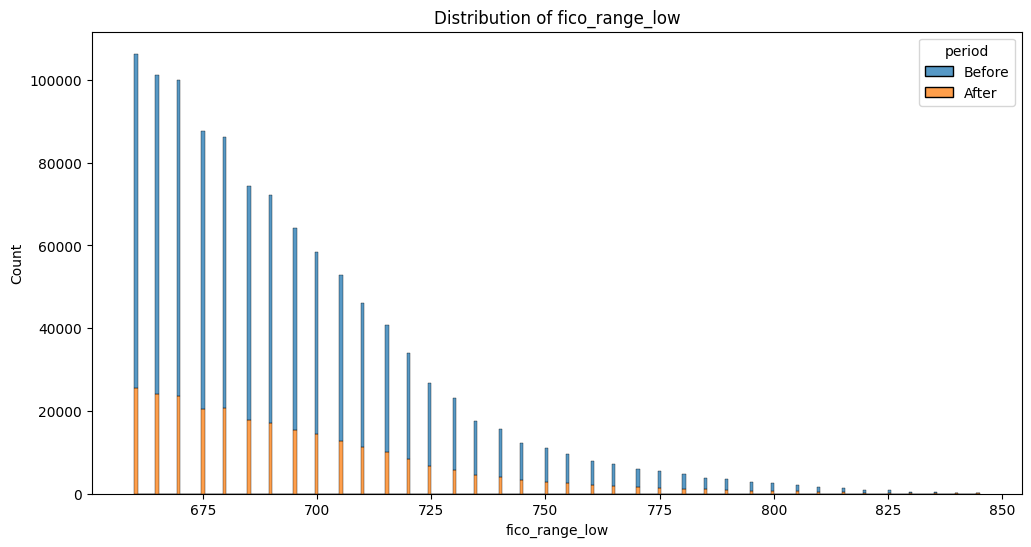


fico_range_low Summary:
           count        mean        std    min    25%    50%    75%    max
period                                                                    
After   264088.0  695.016983  31.171706  660.0  670.0  690.0  710.0  845.0
Before  827043.0  693.792959  30.254400  660.0  670.0  685.0  710.0  845.0


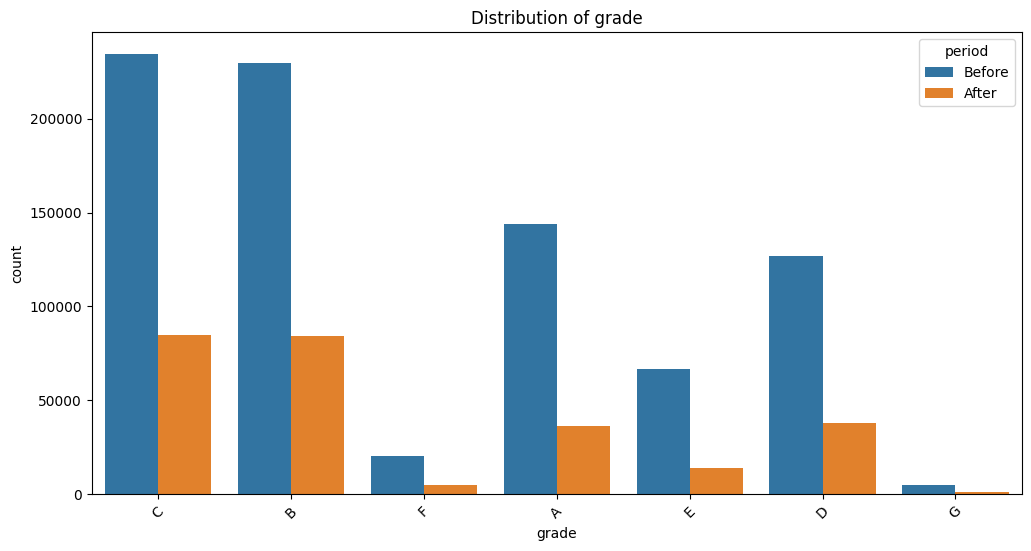


grade Summary:
grade        A       B       C       D      E      F     G
period                                                    
After    36341   84527   84962   37735  14090   5061  1372
Before  143950  229526  234348  127089  66786  20313  5031


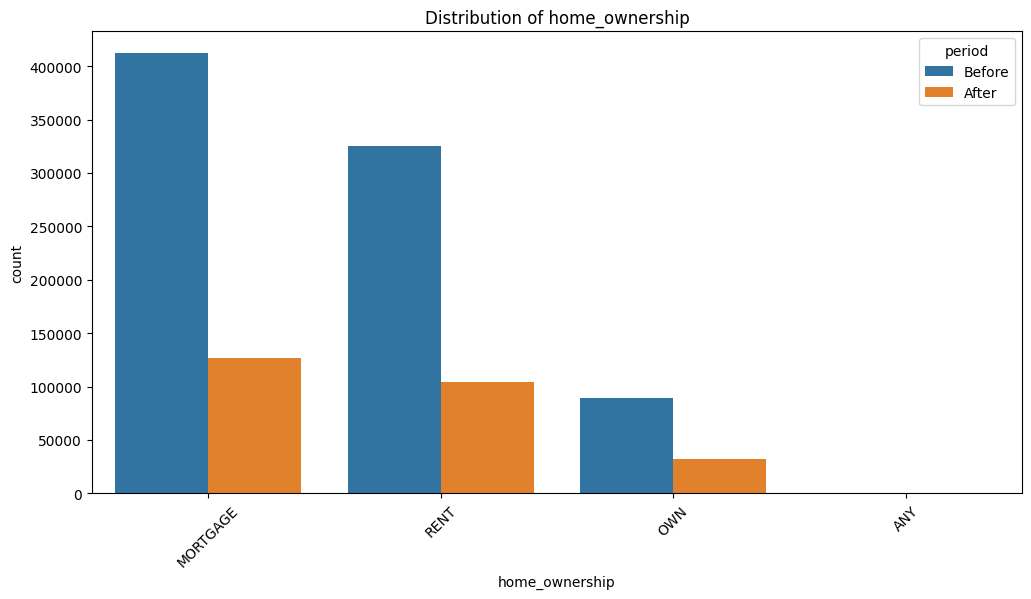


home_ownership Summary:
home_ownership  ANY  MORTGAGE    OWN    RENT
period                                      
After           110    127223  32116  104639
Before            3    411913  89694  325433


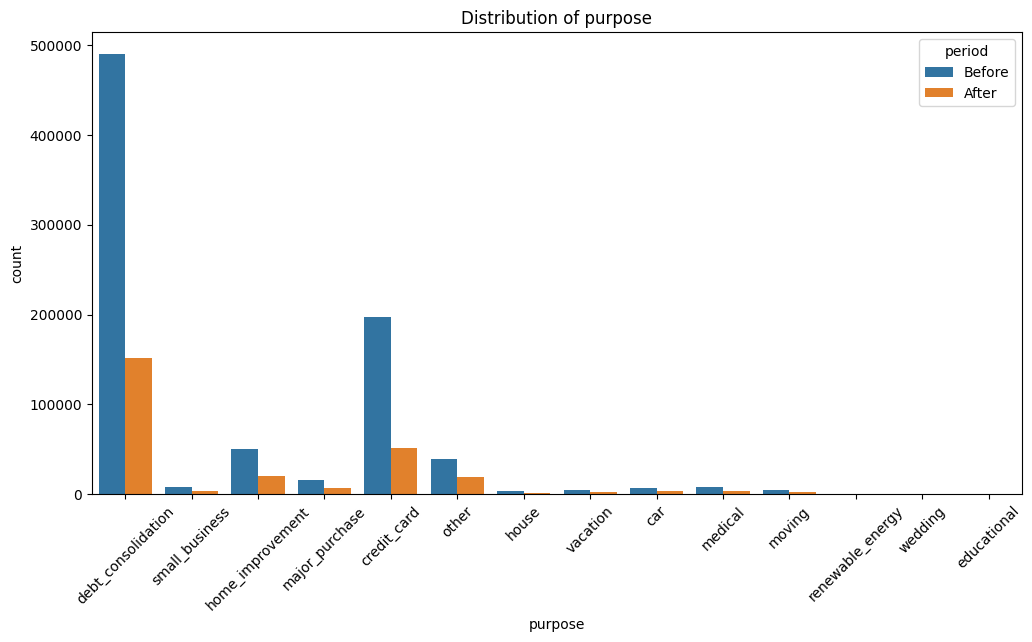


purpose Summary:
purpose   car  credit_card  debt_consolidation  educational  home_improvement  \
period                                                                          
After    3110        51566              151848            0             19799   
Before   7001       197590              490077            1             49721   

purpose  house  major_purchase  medical  moving  other  renewable_energy  \
period                                                                     
After     1273            6581     3557    2177  18733               196   
Before    2917           15132     8152    4800  39311               455   

purpose  small_business  vacation  wedding  
period                                      
After              3000      2246        2  
Before             7431      4443       12  


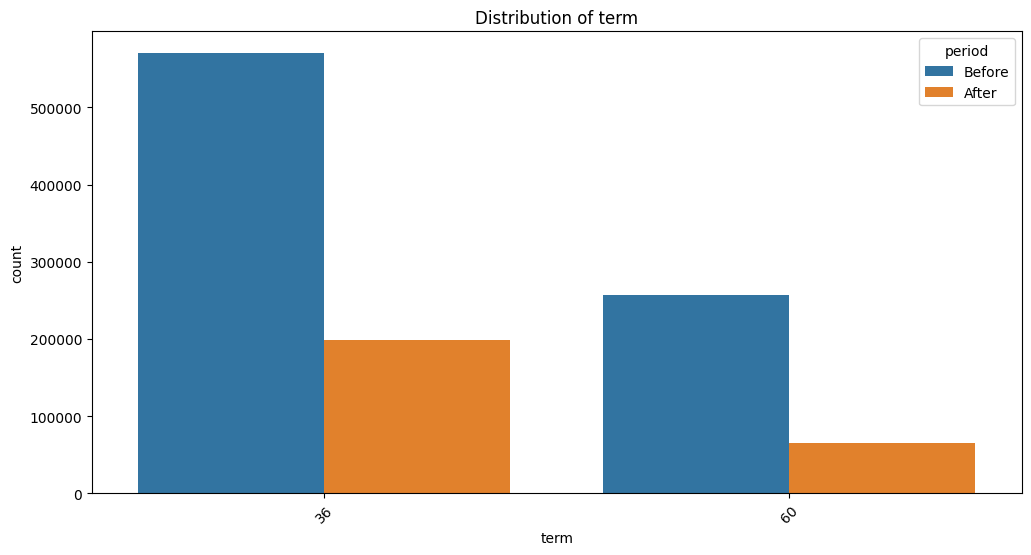


term Summary:
term        36      60
period                
After   199269   64819
Before  569969  257074

Overall Summary:
           loan_amnt  int_rate    annual_inc        dti  fico_range_low
period                                                                 
After   14298.545277  0.134131  79266.977196  18.476174      695.016983
Before  15169.639094  0.129052  76959.469070  18.898561      693.792959


In [8]:
# Load the data
df = pd.read_csv('./cleaned_lending_club_data.csv')

# Convert issue_d to datetime
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%Y-%m-%d')

# Define the two periods
before_controversy = df[df['issue_d'] < '2016-05-01']
after_controversy = df[df['issue_d'] >= '2016-05-01']

# Function to analyze and plot a numeric column
def analyze_numeric(column):
    plt.figure(figsize=(12, 6))
    sns.histplot(data=df, x=column, hue='period', multiple='stack')
    plt.title(f'Distribution of {column}')
    plt.show()

    print(f"\n{column} Summary:")
    print(df.groupby('period')[column].describe())

# Function to analyze and plot a categorical column
def analyze_categorical(column):
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x=column, hue='period')
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    plt.show()

    print(f"\n{column} Summary:")
    print(df.groupby(['period', column]).size().unstack(fill_value=0))

# Add a 'period' column
df['period'] = df['issue_d'].apply(lambda x: 'Before' if x < pd.Timestamp('2016-05-01') else 'After')

# Analyze numeric columns
numeric_columns = ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'fico_range_low']
for column in numeric_columns:
    analyze_numeric(column)

# Analyze categorical columns
categorical_columns = ['grade', 'home_ownership', 'purpose', 'term']
for column in categorical_columns:
    analyze_categorical(column)

# Print overall summary
print("\nOverall Summary:")
print(df.groupby('period').agg({
    'loan_amnt': 'mean',
    'int_rate': 'mean',
    'annual_inc': 'mean',
    'dti': 'mean',
    'fico_range_low': 'mean'
}))


In [9]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

print(numeric_columns.shape)
print(categorical_columns.shape)

(115,)
(33,)


In [10]:
# Standardize numerical features
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

C:\Users\Lawry\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\Lawry\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\Lawry\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [11]:
# Encode categorical features
le = LabelEncoder()
for col in categorical_columns:
    df[col] = le.fit_transform(df[col].astype(str))

In [12]:
# Standardize the specified columns
columns_for_outlier_detection = ['dti', 'annual_inc', 'delinq_2yrs']
df_outlier = df[columns_for_outlier_detection].copy()
df_outlier = (df_outlier - df_outlier.mean()) / df_outlier.std()

# Sum the standardized columns
df_outlier['sum'] = df_outlier.sum(axis=1)

# Calculate IQR
Q1 = df_outlier['sum'].quantile(0.25)
Q3 = df_outlier['sum'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df_outlier[(df_outlier['sum'] < lower_bound) | (df_outlier['sum'] > upper_bound)]

# Calculate the number of rows to remove (1% of total rows)
rows_to_remove = int(0.01 * len(df))

# Sort outliers by their distance from the median
outliers['distance'] = abs(outliers['sum'] - outliers['sum'].median())
outliers_sorted = outliers.sort_values('distance', ascending=False)

# Select the top 1% of outliers
outliers_to_remove = outliers_sorted.head(rows_to_remove)

# Remove outliers from the original dataframe
df_cleaned = df[~df.index.isin(outliers_to_remove.index)]

print(f"Original dataset shape: {df.shape}")
print(f"Cleaned dataset shape: {df_cleaned.shape}")
print(f"Number of outliers removed: {len(df) - len(df_cleaned)}")

C:\Users\Lawry\AppData\Local\Temp\ipykernel_46108\2031672878.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers['distance'] = abs(outliers['sum'] - outliers['sum'].median())


Original dataset shape: (1091131, 149)
Cleaned dataset shape: (1080220, 149)
Number of outliers removed: 10911


: 